In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import astropy
import numpy as np
from astropy.io import fits as pf
import healpy as hp

In [2]:
plt.rc('figure', facecolor = 'w')
plt.rc('figure', dpi=100)
plt.rc('font', size=14)

In [3]:
fileloc = '/home/ssclafani/pi0_decay_healpix_54_SNR_z4kpc_R20kpc_Ts150K_EBV5mag.gz'

In [4]:
#filefromfermi
hd = pf.open('/home/ssclafani/pi0_decay_healpix_54_SNR_z4kpc_R20kpc_Ts150K_EBV5mag.gz')
#filefromjon - a few percent different
hd = pf.open('/data/user/jdumm/galplane_share/fermi_lat_background_pi0.fits')

In [5]:
pf.info(fileloc)

Filename: /home/ssclafani/pi0_decay_healpix_54_SNR_z4kpc_R20kpc_Ts150K_EBV5mag.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SKYMAP        1 BinTableHDU     20   196608R x 1C   [38D]   
  2  ENERGIES      1 BinTableHDU     12   38R x 1C   [1D]   


In [6]:
hd[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [7]:
hd[1].columns

ColDefs(
    name = 'Spectra'; format = '38D'; unit = 'Intensity'
)

In [8]:
hd[2].columns

ColDefs(
    name = 'MeV'; format = '1D'; unit = 'Energy'
)

In [9]:
energies = hd[2].data

In [10]:
e = np.concatenate(energies)
e_GeV = e / 1e3
e_square = e**2

In [11]:
skymaps = hd[1].data

In [12]:
i = len(skymaps)
j = len(skymaps[0][0])
sm_array = np.ndarray((i,j))
for i, sm in enumerate(skymaps):
    #print(i)
    #print(sm[0])
    sm_array[i]= sm[0] 

In [13]:
nside=128
def get_mask(s, lrange=(-8,8), brange=(-80,80)):
    pix = np.arange(0,hp.nside2npix(128))
    pix_theta , pix_phi = hp.pix2ang(nside, pix)
    l = np.pi/2 - pix_theta
    b = pix_phi
    #print()
    mask = (l > np.deg2rad(lrange[0])) & (l < np.deg2rad(lrange[1])) & ((b < np.deg2rad(brange[1])) | (b > np.deg2rad(360+ brange[0])))
    #print(len(mask))
    #print(len(s))
    return mask

In [14]:
masks = []
masked_maps = []
for i, s in enumerate(sm_array.T):

    mask = get_mask(s, lrange=(-8,8), brange=(-80,80))
    maskpix = np.where(~mask)
    splot = np.copy(s)
    splot[maskpix] = 0
    masks.append(mask)
    masked_maps.append(splot)
    #hp.mollview(map=np.log10(splot))

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
0.0 180.0 -180.0 180.0


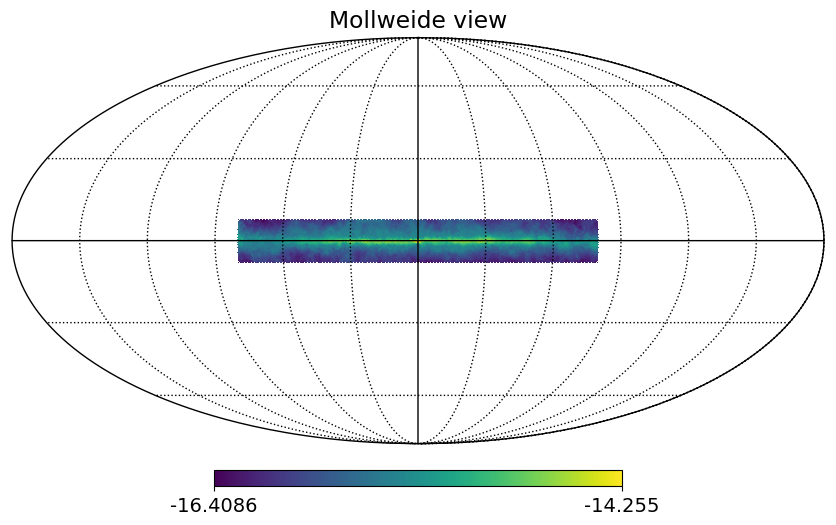

In [15]:
f15 = np.sum(np.array(masked_maps), axis=1) #/   e_width

hp.mollview(map = np.log10(masked_maps[-1]))
hp.graticule()

0.0 180.0 -180.0 180.0


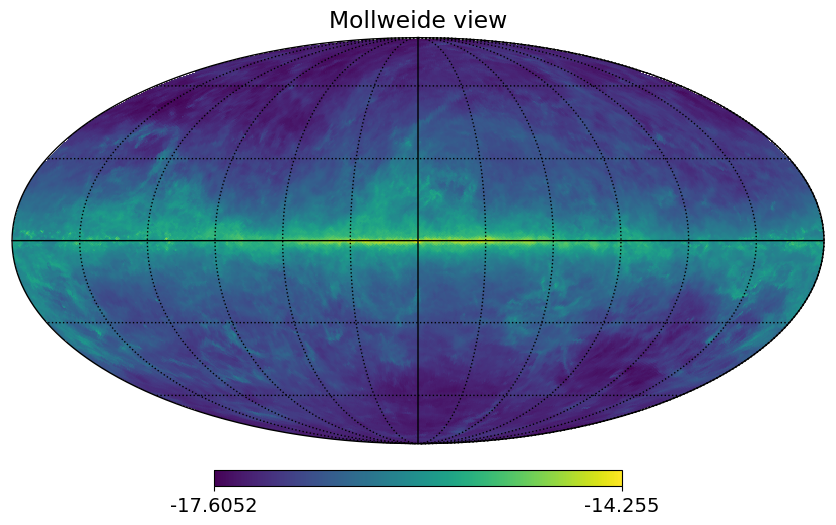

In [16]:
hp.mollview(map=np.log10(sm_array.T[-1]))
hp.graticule()

In [17]:
#webplotdigitized from fig15 
pi0flux = [216.44505242454778, 0.01686168927534161,
248.3667002296323, 0.018576648058415246,
300.3563200260395, 0.019889157206950493,
352.64692110246284, 0.021034531761133502,
384.5414895429321, 0.02166893871388947,
462.0991446732206, 0.02205006504061770,
565.9544327507114, 0.0225096412636866,
664.4843969873062, 0.022443405673391283,
729.1877133172002, 0.0222107744813267,
881.825695544778, 0.0218077355394846,
1080.01316829957, 0.020711608329634534,
1268.038303698556, 0.019607878729693315,
1382.7239341189595, 0.0190338139469571,
1640.6825040770605, 0.017612623357689126,
2009.4205899809374, 0.015746756477159663,
2445.48893590106, 0.01408374493892763,
2976.1893380774172, 0.012366487220969898,
3599.1832901076455, 0.010878635829502395,
4325.097720554821, 0.009537416265115724,
5230.45333330827, 0.008303237853953732,
6285.376421794671, 0.007254374914207259,
7601.069427919403, 0.0062975107672109225,
9134.118883812082, 0.0054878419998326666,
11046.127891080412, 0.004781567476650339,
13358.370187446219, 0.004159442076563209,
16052.601879667818, 0.003640185301269292,
19412.82959012743, 0.00318340540311831,
23476.440487361342, 0.0027818931998334086,
28390.670994037246, 0.002427443049520838,
34333.577951291205, 0.0021228411962742988,
41520.49013512093, 0.0018564615740372748,
50211.81024320945, 0.0016175386033960883,
60722.45004081612, 0.0014104032413383323,
72969.47920931887, 0.0012314246901400949,
87686.59519667245, 0.0010754751945368714]

(100.0, 100000.0)

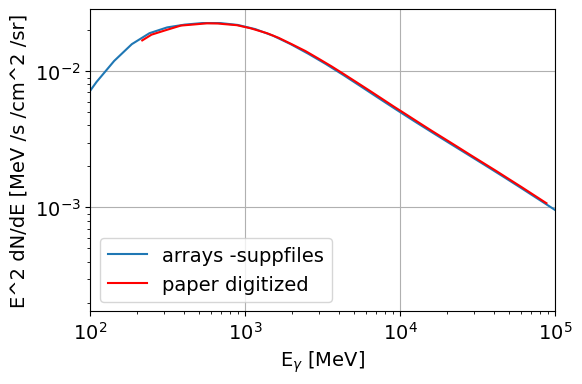

In [18]:
sa =np.sin(np.deg2rad(8) - np.deg2rad(-8)) * (np.deg2rad(160))
plt.loglog(e, e_square *  f15  / sa *  hp.nside2pixarea(128),  label='arrays -suppfiles');
plt.loglog(pi0flux[::2],  np.array(pi0flux[1::2]), c='r', label='paper digitized');
plt.grid()
plt.xlabel('E$_\gamma$ [MeV]')
plt.ylabel('E^2 dN/dE [MeV /s /cm^2 /sr]')
plt.legend()
plt.xlim(1e2,1e5)
#plt.ylim(1e-4,1e-1)


In [19]:
fluxs_MeV = (np.sum(sm_array.T, axis=1))
#fluxs are in MeV cm^-2 s^-1 sr^-1
e2_fluxs = fluxs_MeV * e_square
e2_fluxs_GeV =    e2_fluxs  /1e3 

In [144]:
#Power Law MeV Plot
(np.log10(fluxs_MeV[-1]) - np.log10(fluxs_MeV[-20])) / (np.log10(e[-1]) - np.log10(e[-20]))

-2.7170419615082264

In [58]:
flux_plot[-1]

3.327349269058953e-05

In [135]:
f100tevin = 10**(-.7*(np.log10(1e8) - np.log10(e[-3])) + np.log10(flux_plot[-3]))
print(f100tevin /1e3)
f100tev272in = 10**(-.72*(np.log10(1e8) - np.log10(e[-3])) + np.log10(flux_plot[-3]))
print(f100tev272in /1e3)
f100tev269in = 10**(-.69*(np.log10(1e8) - np.log10(e[-3])) + np.log10(flux_plot[-3]))
print(f100tev269in /1e3)

f100tev = 10**(-.7*(np.log10(1e8) - np.log10(e[-1])) + np.log10(flux_plot[-1]))
print(f100tev /1e3)
f100tev272 = 10**(-.72*(np.log10(1e8) - np.log10(e[-1])) + np.log10(flux_plot[-1]))
print(f100tev272 /1e3)
f100tev269 = 10**(-.69*(np.log10(1e8) - np.log10(e[-1])) + np.log10(flux_plot[-1]))
print(f100tev269 /1e3)

1.1287825652451884e-09
1.0145412849058819e-09
1.1906402967677994e-09
1.1469343601054185e-09
1.0417203303388916e-09
1.2034617054521408e-09


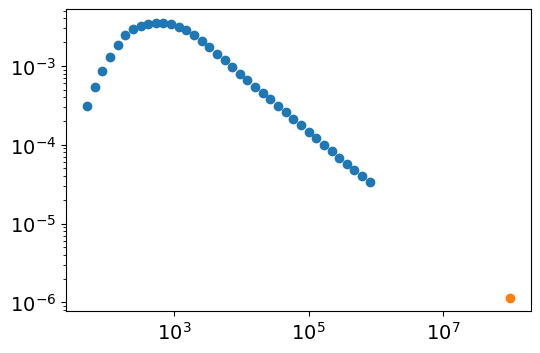

In [90]:
plt.scatter(e, flux_plot)
plt.loglog()
plt.scatter(1e8,  f100tev)

In [91]:
f100tev/1e3

1.1469343601054185e-09

100000000.0 4.171098598338507e-06


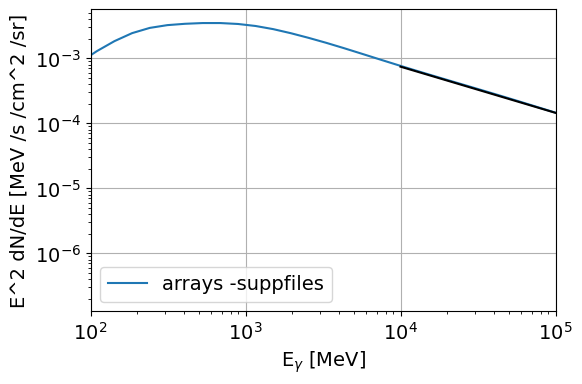

In [92]:
sa = 4*np.pi
flux_plot = e_square *  fluxs_MeV  / sa *  hp.nside2pixarea(128)
plt.loglog(e, flux_plot,  label='arrays -suppfiles');
plt.grid()
plt.xlabel('E$_\gamma$ [MeV]')
plt.ylabel('E^2 dN/dE [MeV /s /cm^2 /sr]')
plt.legend()
plt.xlim(1e2,1e5)
#plt.ylim(1e-4,1e-1)

x_pred = np.linspace(4,9, 1000)
b1, b0, _, _, _ = stats.linregress(np.log10(e[-10:]), 
                                               np.log10(flux_plot[-10:])) 
y_pred = b1 * x_pred + b0  
plt.loglog(10 ** x_pred, 10 ** y_pred, color = 'k', linestyle = "-", 
           label='Extrapolated Flux')

xspace=np.arange(8e7,12e7,1e7)
interp = np.interp(xspace,10**x_pred, 10**y_pred)

print(xspace[2], interp[2]*4*np.pi*0.31)

100000 4.8452420264711245e-09
4.467968694222547e-09
100000 3.99092669485615e-09


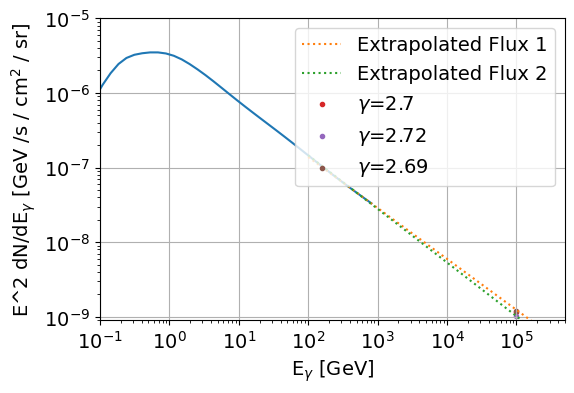

In [145]:

fluxs_GeV_plot = e2_fluxs_GeV * hp.nside2pixarea(128) / (4*np.pi) 

fig, ax = plt.subplots(figsize=(6,4))
plt.loglog(e_GeV, fluxs_GeV_plot );
plt.ylabel('E^2 dN/dE$_\gamma$ [GeV /s / cm$^2$ / sr]' )
plt.xlabel('E$_\gamma$ [GeV]')
plt.grid('both')

x_pred = np.linspace(2,6, 1000)
b1, b0, _r, _p_val, _stderr = stats.linregress(np.log10(e_GeV[-5:]), 
                                               np.log10(fluxs_GeV_plot[-5:])) 
y_pred = b1 * x_pred + b0  
plt.loglog(10 ** x_pred, 10 ** y_pred, linestyle = ":", 
           label='Extrapolated Flux 1')
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**x_pred, 10**y_pred)
print(xspace[2], interp[2]*4*np.pi*0.31)
x_pred = np.linspace(2,6, 1000)
b1, b0, _r, _p_val, _stderr = stats.linregress(np.log10(e_GeV[-18:]), 
                                               np.log10(fluxs_GeV_plot[-18:])) 
y_pred = b1 * x_pred + b0  
plt.loglog(10 ** x_pred, 10 ** y_pred, linestyle = ":", 
           label='Extrapolated Flux 2')
plt.ylim(.9e-9,1e-5)
plt.xlim(1e-1,5e5)
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**x_pred, 10**y_pred)
plt.scatter(1e5, f100tev/1e3, marker = '.', color='C3', label='$\gamma$=2.7')
plt.scatter(1e5, f100tev272/1e3, marker = '.', color='C4',label='$\gamma$=2.72')
plt.scatter(1e5, f100tev269/1e3, marker = '.', color='C5',label='$\gamma$=2.69')
print(f100tev/1e3*4*np.pi*0.31)
print(xspace[2], interp[2]*4*np.pi*0.31)
plt.legend()

100000 4.8452420264711245e-09
4.467968694222547e-09
100000 3.99092669485615e-09


Text(0, 0.5, 'x Model Norm')

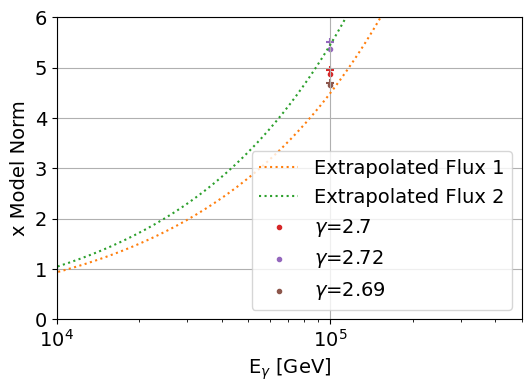

In [148]:
f = 2.18e-8
fluxs_GeV_plot = e2_fluxs_GeV * hp.nside2pixarea(128) / (4*np.pi) 

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(e_GeV, fluxs_GeV_plot );
plt.ylabel('E^2 dN/dE$_\gamma$ [GeV /s / cm$^2$ / sr]' )
plt.xlabel('E$_\gamma$ [GeV]')
plt.grid('both')

x_pred = np.linspace(2,6, 1000)
b1, b0, _r, _p_val, _stderr = stats.linregress(np.log10(e_GeV[-5:]), 
                                               np.log10(fluxs_GeV_plot[-5:])) 
y_pred = b1 * x_pred + b0  
plt.plot(10 ** x_pred, 2.18e-8/ (10 ** y_pred * np.pi*4*0.31), linestyle = ":", 
           label='Extrapolated Flux 1')
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**x_pred, 10**y_pred)
print(xspace[2], interp[2]*4*np.pi*0.31)
x_pred = np.linspace(2,6, 1000)
b1, b0, _r, _p_val, _stderr = stats.linregress(np.log10(e_GeV[-18:]), 
                                               np.log10(fluxs_GeV_plot[-18:])) 
y_pred = b1 * x_pred + b0  
plt.plot(10 ** x_pred, 2.18e-8/ (10 ** y_pred* np.pi*4*0.31), linestyle = ":", 
           label='Extrapolated Flux 2')
#plt.ylim(.8e-9,2e-9)

xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**x_pred, 10**y_pred)
plt.scatter(1e5, 2.18e-8 / (f100tev/1e3* 0.31*np.pi*4), marker = '.', color='C3', label='$\gamma$=2.7')
plt.scatter(1e5, 2.18e-8 / (f100tev272/1e3* 0.31*np.pi*4), marker = '.', color='C4', label='$\gamma$=2.72')
plt.scatter(1e5, 2.18e-8 / (f100tev269/1e3* 0.31*np.pi*4), marker = '.', color='C5', label='$\gamma$=2.69')
plt.scatter(1e5, 2.18e-8 / (f100tevin/1e3* 0.31*np.pi*4), marker = '+', color='C3', )
plt.scatter(1e5, 2.18e-8 / (f100tev272in/1e3* 0.31*np.pi*4), marker = '+', color='C4',)
plt.scatter(1e5, 2.18e-8 / (f100tev269in/1e3* 0.31*np.pi*4), marker = '+', color='C5', )

print(f100tev/1e3*4*np.pi*0.31)
print(xspace[2], interp[2]*4*np.pi*0.31)
plt.semilogx()
plt.legend()
plt.xlim(1e4,5e5)
plt.ylim(0,6)
plt.ylabel('x Model Norm')

100000 3.984982162884719e-09


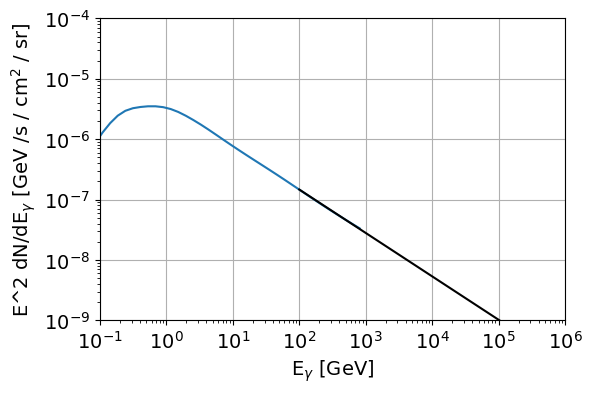

In [94]:

fluxs_GeV_plot = e2_fluxs_GeV * hp.nside2pixarea(128) / (4*np.pi) 

fig, ax = plt.subplots(figsize=(6,4))
plt.loglog(e_GeV, fluxs_GeV_plot );
plt.ylabel('E^2 dN/dE$_\gamma$ [GeV /s / cm$^2$ / sr]' )
plt.xlabel('E$_\gamma$ [GeV]')
plt.grid('both')

x_pred = np.linspace(2,6, 1000)
b1, b0, _, _, _ = stats.linregress(np.log10(e_GeV[23:]), 
                                               np.log10(fluxs_GeV_plot[23:])) 
y_pred = b1 * x_pred + b0  
plt.loglog(10 ** x_pred, 10 ** y_pred, color = 'k', linestyle = "-", 
           label='Extrapolated Flux')
plt.ylim(1e-9,1e-4)
plt.xlim(1e-1,1e6)
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**x_pred, 10**y_pred)
print(xspace[2], interp[2]*4*np.pi*0.31)